# <center> ***MACHINE LEARNING BASED LUEKAEMIA CANCER PREDICTION SYSTEM USING PROTEIN SEQUENTIAL DATA*** </center>


## ***Note:***
#### *The features are extracted from Di-peptide Compissiton Technique*

# ***Table of Content***
1. Importing Libraries.

2. Collecting information about dataset.
3. Spltting dataset into X and Y.
4. Outliers Identification
5. Outlier Removal.
6. Null Value Checking.
7. Dropping some Features.
8. Filling NaN values
9. Passing data through Machine Learning Algorithms

    - SVM = 90% ~ 93%
    
    - Random Forest = 90% ~ 92%
    - K Neighbour Classifier = 83% ~ 84%
    - XG-Boost = 84% ~ 85%
    - Decision Tree = 81% ~ 84%
    - Logistic Regression = 66% ~ 67%
    - ROC Curve for all the above algorithms

### ***Importing Libraries***

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

### ***Reading Dataset csv file***

In [2]:
df=pd.read_csv('CML_DC_Combined_1.csv')
df.head(3)

,Var1_1,Var1_2,Var1_3,Var1_4,Var1_5,Var1_6,Var1_7,Var1_8,Var1_9,Var1_10,...,Var1_392,Var1_393,Var1_394,Var1_395,Var1_396,Var1_397,Var1_398,Var1_399,Var1_400,Label
0,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.005747,...,0.0,0.000000,0.011494,0.0,0.011494,0.00000,0.0,0.0,0.005747,1
1,0.017241,0.00431,0.004310,0.00431,0.0,0.008621,0.004310,0.008621,0.0,0.004310,...,0.0,0.000000,0.004310,0.0,0.004310,0.00431,0.0,0.0,0.012931,1
2,0.005076,0.00000,0.005076,0.00000,0.0,0.000000,0.015228,0.005076,0.0,0.005076,...,0.0,0.005076,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,1


### ***Checking Shape of Dataset***

In [3]:
df.shape

(3382, 401)

### ***Getting some information***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Columns: 401 entries, Var1_1 to Label
dtypes: float64(400), int64(1)
memory usage: 10.3 MB


### ***Splitting into Input & Output***

In [5]:
X_input = df.iloc[:,0:400] 
Y_output = df.iloc[:,-1]
print(f'Shape of X_input:{X_input.shape}\nShape of Y_output:{Y_output.shape}')

Shape of X_input:(3382, 400)
Shape of Y_output:(3382,)


### ***Input data sample***

In [6]:
print('X_input sample:')
X_input.sample(3)

X_input sample:


,Var1_1,Var1_2,Var1_3,Var1_4,Var1_5,Var1_6,Var1_7,Var1_8,Var1_9,Var1_10,...,Var1_391,Var1_392,Var1_393,Var1_394,Var1_395,Var1_396,Var1_397,Var1_398,Var1_399,Var1_400
2335,0.012111,0.001730,0.001730,0.005190,0.003460,0.010381,0.006920,0.001730,0.00173,0.001730,...,0.008651,0.003460,0.001730,0.001730,0.001730,0.006920,0.000000,0.00173,0.000000,0.003460
2783,0.004202,0.005042,0.007563,0.002521,0.000000,0.004202,0.003361,0.002521,0.00000,0.001681,...,0.006723,0.004202,0.001681,0.001681,0.010924,0.009244,0.006723,0.00000,0.002521,0.002521
3084,0.010922,0.001214,0.004854,0.001214,0.002427,0.003641,0.001214,0.003641,0.00000,0.000000,...,0.004854,0.006068,0.000000,0.001214,0.003641,0.004854,0.004854,0.00000,0.001214,0.004854


### ***Output data sample***

In [7]:
print('Y_output sample:')
Y_output.sample(3)

Y_output sample:


1158    0
373     1
946     1
Name: Label, dtype: int64

## ***Checking Outliers***

(-0.01, 0.3)

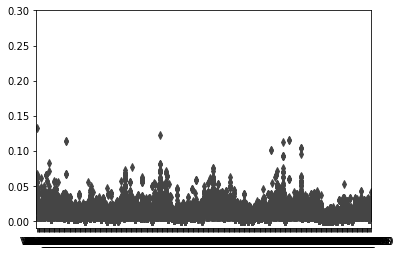

In [8]:
sns.boxplot(data=X_input)
plt.ylim(-0.01,0.3)


<AxesSubplot:>

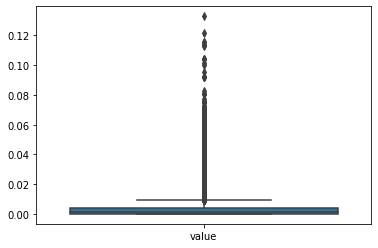

In [9]:
sns.boxplot(data=pd.melt(X_input))

### ***Removing Outliers***

In [10]:
max_threshold = X_input.quantile(0.95)
min_threshold = X_input.quantile(0.01)
X_input_removed_outliers = X_input[(X_input<max_threshold)&(X_input>min_threshold)]

### ***Results***

(-0.01, 0.3)

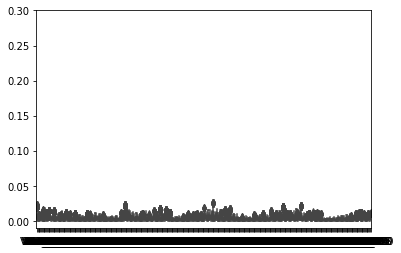

In [11]:
sns.boxplot(data=X_input_removed_outliers)
plt.ylim(-0.01,0.3)

<AxesSubplot:>

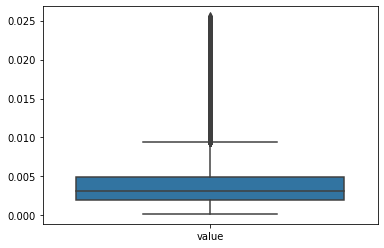

In [12]:
sns.boxplot(data=pd.melt(X_input_removed_outliers))

## ***Now Checking Null values***

In [13]:
null_checking=X_input_removed_outliers.isnull().sum()
null_checking = null_checking.to_frame()


### ***Note***
- *Dropping those columns where*

In [14]:
X_input_dropped = X_input_removed_outliers.drop(columns=['Var1_5','Var1_9','Var1_18','Var1_19','Var1_25','Var1_29','Var1_33','Var1_38','Var1_43','Var1_44','Var1_45','Var1_47','Var1_49','Var1_53','Var1_54','Var1_58','Var1_59','Var1_63','Var1_65','Var1_69','Var1_73','Var1_78','Var1_79','Var1_81','Var1_82','Var1_83','Var1_84','Var1_85','Var1_86','Var1_87','Var1_88','Var1_89','Var1_90','Var1_92','Var1_93','Var1_94','Var1_95','Var1_96','Var1_97','Var1_98','Var1_99','Var1_100','Var1_105','Var1_109','Var1_118','Var1_123','Var1_125','Var1_129','Var1_133','Var1_138','Var1_139','Var1_145','Var1_153','Var1_158','Var1_161','Var1_162','Var1_163','Var1_164','Var1_165','Var1_166','Var1_167','Var1_168','Var1_169','Var1_170','Var1_172','Var1_173','Var1_174','Var1_175','Var1_177','Var1_178','Var1_179','Var1_180','Var1_185','Var1_189','Var1_193','Var1_194','Var1_198','Var1_199','Var1_218','Var1_225','Var1_229','Var1_233','Var1_239','Var1_241','Var1_242','Var1_243','Var1_244','Var1_245','Var1_246','Var1_247','Var1_248','Var1_249','Var1_250','Var1_252','Var1_253','Var1_254','Var1_255','Var1_256','Var1_257','Var1_258','Var1_259','Var1_260','Var1_262','Var1_263','Var1_264','Var1_265','Var1_267','Var1_268','Var1_269','Var1_270','Var1_272','Var1_273','Var1_274','Var1_275','Var1_276','Var1_277','Var1_278','Var1_279','Var1_285','Var1_289','Var1_293','Var1_298','Var1_299','Var1_305','Var1_313','Var1_318','Var1_325','Var1_329','Var1_333','Var1_338','Var1_339','Var1_340','Var1_341','Var1_342','Var1_343','Var1_344','Var1_345','Var1_346','Var1_347','Var1_348','Var1_349','Var1_350','Var1_352','Var1_353','Var1_354','Var1_355','Var1_356','Var1_357','Var1_358','Var1_359','Var1_360','Var1_362','Var1_263','Var1_364','Var1_365','Var1_367','Var1_368','Var1_369','Var1_370','Var1_372','Var1_373','Var1_374','Var1_375','Var1_376','Var1_377','Var1_378','Var1_379','Var1_385','Var1_389','Var1_393','Var1_398','Var1_399'])

### ***Checking Mean values of each column***

In [15]:
mean=X_input_dropped.mean()
mean

Var1_1      0.007501
Var1_2      0.004626
Var1_3      0.002974
Var1_4      0.003760
Var1_6      0.005792
              ...   
Var1_394    0.003121
Var1_395    0.004600
Var1_396    0.005008
Var1_397    0.004461
Var1_400    0.004731
Length: 229, dtype: float64

### ***Filling Null values of each column with its mean***

In [16]:
X_input_new=X_input_dropped.fillna(mean)

In [17]:
X_input_new.shape

(3382, 229)

### ***After filling Null values:***
#### - ***we will make sure there is no NaN values in dataset***

In [18]:
X_input_new.isnull().sum()

Var1_1      0
Var1_2      0
Var1_3      0
Var1_4      0
Var1_6      0
           ..
Var1_394    0
Var1_395    0
Var1_396    0
Var1_397    0
Var1_400    0
Length: 229, dtype: int64

## <center>***Passing Data to Machine Learning Algorithms***</center>

### ***Implementing Decision Tree Classifier***

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X_input_new,Y_output,test_size=0.2)
dt_model = DecisionTreeClassifier(random_state=50,min_samples_leaf=1).fit(X_train,Y_train)
Y_predicted = dt_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
# saving model using pickle
import pickle
pickle.dump(dt_model,open('dt_model.pkl','wb'))

the accuracy score is:0.843426883308715
the f1-score is:0.7180851063829787
the recall-score is:0.5947136563876652
the confusion_matrix is:[[436  14]
 [ 92 135]]
Specificity is: 0.9688888888888889
Precision is: 0.9060402684563759


### ***ROC_Curve for Decision Tree***

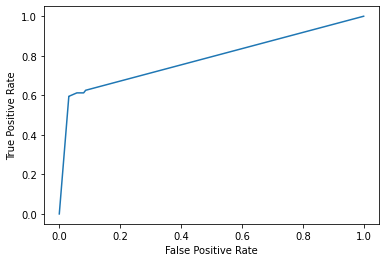

In [31]:
y_pred_proba = dt_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing Random Forest Classifier***

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X_input_new,Y_output,test_size=0.2)
rf_model = RandomForestClassifier(n_estimators=150,max_depth=160).fit(X_train,Y_train)
Y_predicted = rf_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
# saving model using pickle
pickle.dump(rf_model,open('rf_model.pkl','wb'))


the accuracy score is:0.8005908419497785
the f1-score is:0.5994065281899109
the recall-score is:0.45701357466063347
the confusion_matrix is:[[441  15]
 [120 101]]
Specificity is: 0.9671052631578947
Precision is: 0.8706896551724138


### ***ROC_Curve for Random Forest***

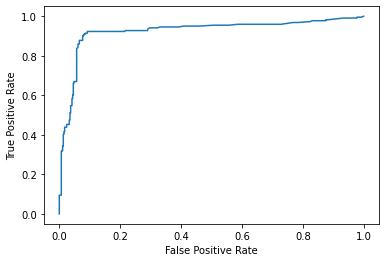

In [34]:
y_pred_proba = rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing Logistic Regression***

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X_input_new,Y_output,test_size=0.2)
lr_model = LogisticRegression(C=10,penalty='l2',tol=0.1).fit(X_train,Y_train)
Y_predicted = lr_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
#Recall (aka Sensitivity)
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
# saving model using pickle
pickle.dump(lr_model,open('lr_model.pkl','wb'))

the accuracy score is:0.6573116691285081
the f1-score is:0.0
the recall-score is:0.0
the confusion_matrix is:[[445   0]
 [232   0]]
Specificity is: 1.0
Precision is: nan


C:\Users\CU-43\AppData\Local\Temp\ipykernel_10664\518390091.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = tp / (tp+fp)


### ***ROC_Curve for Logistic Reggrestion***

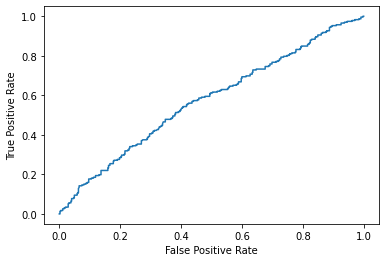

In [36]:
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing Support Vector Classifier***

In [37]:
svc_model = SVC(kernel='rbf',  C=1000,gamma=1000000,probability=True).fit(X_train,Y_train)
Y_predicted = svc_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
#Recall (aka Sensitivity)
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
# saving model using pickle
pickle.dump(svc_model,open('svc_model.pkl','wb'))

the accuracy score is:0.9409158050221565
the f1-score is:0.9148936170212766
the recall-score is:0.9267241379310345
the confusion_matrix is:[[422  23]
 [ 17 215]]
Specificity is: 0.9483146067415731
Precision is: 0.9033613445378151


### ***ROC_Curve for SVC***

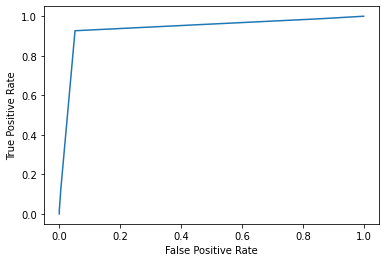

In [38]:
y_pred_proba = svc_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ***Implementing K Neighbour Classifier***

In [39]:

knn_model = KNeighborsClassifier(n_neighbors=1).fit(X_train,Y_train)
Y_predicted = knn_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
#Recall (aka Sensitivity)
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
# saving model using pickle
pickle.dump(knn_model,open('knn_model.pkl','wb'))


the accuracy score is:0.7193500738552437
the f1-score is:0.3831168831168831
the recall-score is:0.2543103448275862
the confusion_matrix is:[[428  17]
 [173  59]]
Specificity is: 0.9617977528089887
Precision is: 0.7763157894736842


### ***Implementing XG Boost***

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X_input_new,Y_output,test_size=0.2)
xgb_model = XGBClassifier(learning_rate =0.5,n_estimators=120).fit(X_train,Y_train)
Y_predicted = xgb_model.predict(X_test)
# in line 5 Y_test means Y_true
score = accuracy_score(Y_test,Y_predicted)
print(f'the accuracy score is:{score}')
f1 = f1_score(Y_test,Y_predicted)
print(f'the f1-score is:{f1}')
rcl = recall_score(Y_test,Y_predicted)
print(f'the recall-score is:{rcl}')
con_matrix = confusion_matrix(Y_test,Y_predicted)
print(f'the confusion_matrix is:{con_matrix}')
tn, fp, fn, tp = con_matrix.ravel() # ravel is used to flatten returns contiguous flattened array
specificity = tn / (tn+fp)
print(f'Specificity is:',specificity)
precision = tp / (tp+fp)
print(f'Precision is:',precision)
# saving model using pickle
pickle.dump(xgb_model,open('xgb_model.pkl','wb'))






the accuracy score is:0.8153618906942393
the f1-score is:0.6753246753246753
the recall-score is:0.5531914893617021
the confusion_matrix is:[[422  20]
 [105 130]]
Specificity is: 0.9547511312217195
Precision is: 0.8666666666666667


### ***ROC_Curve for XG Bosst***

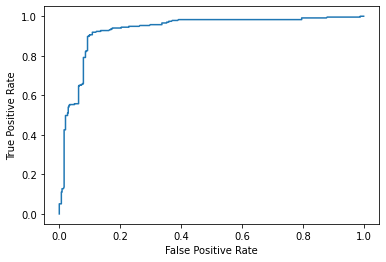

In [43]:
y_pred_proba = xgb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

******